In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Lambda
from keras.objectives import binary_crossentropy,mse
import numpy as np
import random
import tensorflow as tf
import keras.backend as K
import matplotlib.pyplot as plt
from keras.models import Model
from keras.datasets import mnist

/home/pawanagr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## In this Notebook, we will Implement Variational Autoencoder on MNIST data set

### First step will load the data and we use keras datasets to do that.


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape
x_=np.zeros((60000,784))
x_t=np.zeros((10000,784))

### we will Normlize our Image data 

In [4]:
for i in range(60000):
    x_[i] = np.reshape(x_train[i],(784))/255.0
    if i<10000:
        x_t[i] = np.reshape(x_test[i],(784))/255.0


In [5]:
x_t.shape

(10000, 784)

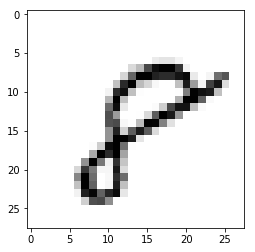

In [6]:
plt.imshow(x_train[i],cmap = 'Greys')

### Now we will define our model in Keras
### sampling layer will randomly sample mean layer and standered diviation layer 

In [7]:
def sampling(args):
    z_mean, z_std = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_std) * epsilon


In [8]:
#model


In [9]:
inpu =  Input(shape = (784,))
# encoder 
h1 = Dense(256,activation = 'relu')(inpu)
z_mean = Dense(2,activation = 'linear')(h1)
z_std = Dense(2,activation = 'linear')(h1)


In [10]:
# Sampling layer  
z = Lambda(sampling, output_shape=(2,), name='z')([z_mean, z_std])


In [11]:
enco = Model(inpu,[z_mean,z_std])
enco.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            514         dense_1[0][0]                    
Total params: 201,988
Trainable params: 201,988
Non-trainable params: 0
_____________________________________

In [12]:
# decoder model
x = Dense(256, activation='relu')(z)
out = Dense(784, activation='sigmoid')(x)


### We can see our model by using keras model function Model.summary() 

In [13]:

vae = Model(inpu,out)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

### Now we will define our loss for VAE 
#### VAE loss = reconstruction_error + KL divergence

In [6]:
def loss_(y_true,y_pred):
    recon = mse(y_true,y_pred)*784
    kl = 0.5 * K.sum(K.exp(z_std) + K.square(z_mean) - 1. - z_std, axis=1)
    return K.mean(recon + kl)

In [22]:
#define loss

In [23]:
vae.compile(optimizer='adam',loss = loss_)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

In [24]:
vae.fit(x_,x_,epochs=10,batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 52.7601
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 42.7638
Epoch 3/10
60000/60000 [==============================] - 12s 196us/step - loss: 41.8870
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 41.3325
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 40.9732
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 40.6260
Epoch 7/10
60000/60000 [==============================] - 12s 207us/step - loss: 40.3371
Epoch 8/10
60000/60000 [==============================] - 12s 207us/step - loss: 40.1086
Epoch 9/10
60000/60000 [==============================] - 12s 206us/step - loss: 39.9010
Epoch 10/10
60000/60000 [==============================] - 12s 204us/step - loss: 39.7104


In [25]:
pp = vae.predict(x_)

In [26]:
pp.shape

(60000, 784)

In [27]:
max(pp[456])

0.7951331

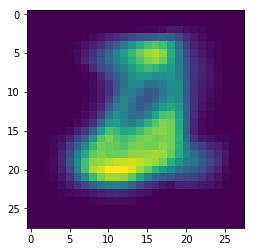

In [30]:
plt.imshow(np.reshape(pp[5],(28,28)))

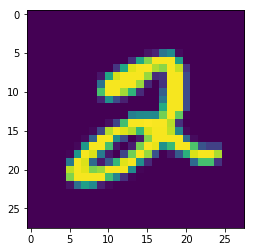

In [32]:
plt.imshow(x_train[5])